This project is divided in two parts. In the first part we use Keras to understand, build and train a Deep Neural Network model. In the second part, we experiment with training and improving the Deep Learning model.

#### need to be installed
* [Keras](https://keras.io)
* [Tensorflow](https://www.tensorflow.org/install/)
* ```sklearn```, ```matplotlib``` and ```numpy``` also need to be installed

Since Tensorflow 2.0, Keras is included in Tensorflow and will be automatically installed with Tensorflow. It can be accessed as ```tensorflow.keras```


## Part 1

### Losses
The purpose of loss functions is to compute the quantity that a model should seek to minimize during training.
https://keras.io/api/losses/

### Optimizers

Optimization Algoritms are used to update the parameters of a model (weights and biases) to reduce the losses.
See a list of available optimizers here - https://keras.io/api/optimizers/

For a more complete overview of optimization algorithms see [this comparison](http://ruder.io/optimizing-gradient-descent/).

## MNIST

We use the [MNIST](https://en.wikipedia.org/wiki/MNIST_database) database here. MNIST is a database of handwritten digits with 784 features, size-normalized and centered in 28x28 grayscale images. The datasets X and y are N-Dimensional array type. X is a dataset array of first 1000 images from MNIST. y is a dataset array of labels for these images.
    
```X = X.reshape(X.shape[0], 28, 28, 1)``` is used to reshape X to represent the 1000 images in a 4D array. 28x28 pixels in 1 channel, greyscale images.

In [1]:
# imports
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
# for the random seed
import tensorflow as tf

# set the random seeds to get reproducible results
np.random.seed(1)
tf.random.set_seed(2)

# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X, y = X[:1000], y[:1000]
X = X.reshape(X.shape[0], 28, 28, 1)
# Normalize
X = X / 255.
# number of unique classes
num_classes = len(np.unique(y))
y = y.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

num_tot = y.shape[0]
num_train = y_train.shape[0]
num_test = y_test.shape[0]

y_oh = np.zeros((num_tot, num_classes))
y_oh[range(num_tot), y] = 1

y_oh_train = np.zeros((num_train, num_classes))
y_oh_train[range(num_train), y_train] = 1

y_oh_test = np.zeros((num_test, num_classes))
y_oh_test[range(num_test), y_test] = 1

Check type and shape of X

In [2]:
type(X)

numpy.ndarray

In [3]:
X.shape

(1000, 28, 28, 1)

y is a labeled categorical dataset array and y_oh is an array consisting of dummy variables created for the y dataset.
    
One-hot encoding is used in y_oh, to convert the categorical variable y to numeric (containing different classes to be identified. Even though they are representing digits, here they are labels/classes and hence non-ordered values).

In [4]:
print (f"First five rows of y:\n", (y[0:5])) 
print (f"First five rows of y_oh:\n", (y_oh[0:5])) 

First five rows of y:
 [5 0 4 1 9]
First five rows of y_oh:
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


Data samples below along with the correct labels.

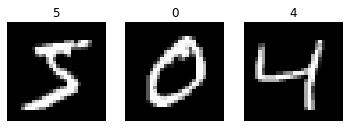

In [5]:
#three data examples with labels
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.title(y[i])
    plt.imshow(X[i])
    plt.gray()
    plt.axis('off') #we can remove this to see the image size

### CNN model

We build a convolutional neural network ([CNN](https://medium.com/@RaghavPrabhu/understanding-of-convolutional-neural-network-cnn-deep-learning-99760835f148), typically used for images recognition and classifications)
    
Dropout() is used to randonly drop neurons and their weights to avoid overfitting during training by learning lot of associations. It is a regularization technique used to ensure the model generalises well to new data.


ReLU is used for activation on hidden layers and Softmax is used as an activation function for the output layer as it can handle multi-classification models like this one to give probability distribution for all classes, sum of which adds to 1. 

Categorical Crossentropy loss function is used. We start of by using the SGD optimizer. Weights are updated after every 32 data samples (batch_size=32).

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD


model = Sequential()

model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# Max pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.))

model.add(Conv2D(32, (3, 3), activation='relu'))
# Max pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.))

model.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=sgd)

# Train the model
model.fit(X_train, y_oh_train, batch_size=32, epochs=60)

# Evaluate performance
test_loss = model.evaluate(X_test, y_oh_test, batch_size=32)

predictions = model.predict(X_test, batch_size=32)
predictions = np.argmax(predictions, axis=1) # change encoding again
print('Accuracy:', (predictions == y_test).sum() / predictions.shape[0])

Train on 800 samples
Epoch 1/60
800/800 [==============================] - 1s 655us/sample - loss: 2.1417
Epoch 2/60
800/800 [==============================] - 0s 267us/sample - loss: 1.0528
Epoch 3/60
800/800 [==============================] - 0s 266us/sample - loss: 0.5263
Epoch 4/60
800/800 [==============================] - 0s 240us/sample - loss: 0.3314
Epoch 5/60
800/800 [==============================] - 0s 241us/sample - loss: 0.2443
Epoch 6/60
800/800 [==============================] - 0s 233us/sample - loss: 0.2027
Epoch 7/60
800/800 [==============================] - 0s 230us/sample - loss: 0.1541
Epoch 8/60
800/800 [==============================] - 0s 233us/sample - loss: 0.1233
Epoch 9/60
800/800 [==============================] - 0s 255us/sample - loss: 0.0926
Epoch 10/60
800/800 [==============================] - 0s 251us/sample - loss: 0.0741
Epoch 11/60
800/800 [==============================] - 0s 228us/sample - loss: 0.0494
Epoch 12/60
800/800 [=====================

Number of parameters (weights and biases) in the model-

    Conv2D Layer1: 3x3x1x16+1x16=160
    Conv2D Layer2: 3x3x16x32+1x32=4,640
    Dense Layer1: 800x128+1x128=102,528
    Dense Layer2: 128x10+1x10=1,290
    Total parameters in the model = 108,618

In [7]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               1

## Part 2: Hyperparameter tuning

A model's performance depends on many factors apart from the model architecture (e.g. type and number of layers) and the dataset. Any parameter that alters the learning of a model falls under hyperparameters. We can use various search methods to allow the algorithms to identify the best hyperparameters for the model, this process is called [hyperparameter tuning](https://en.wikipedia.org/wiki/Hyperparameter_optimization). It is best to use human judgement together with results from the hyperparameter search algorithms to arrive at the optimal parameters basis the task in hand and the resources available.

We compare the training set loss with the loss on the test (/validation, read comments in the end) set to evaluate our model's learning performance.

We look at the effect of a few hyperparameters here to illustrate this.

We start by training the model on 150 epochs and visualizing the loss.

### Visualizing the training

In [8]:
model = Sequential()
model.reset_states()

model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# Max pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.))

model.add(Conv2D(32, (3, 3), activation='relu'))
# Max pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.))

model.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=sgd)

# Train the model
history = model.fit(X_train, y_oh_train, batch_size=32, epochs=150, validation_data = (X_test, y_oh_test))

# Evaluate performance
test_loss = model.evaluate(X_test, y_oh_test, batch_size=32)

predictions = model.predict(X_test, batch_size=32)
predictions = np.argmax(predictions, axis=1) # change encoding again
print('Accuracy:', (predictions == y_test).sum() / predictions.shape[0])

Train on 800 samples, validate on 200 samples
Epoch 1/150
800/800 [==============================] - 1s 770us/sample - loss: 2.1353 - val_loss: 1.7712
Epoch 2/150
800/800 [==============================] - 0s 364us/sample - loss: 1.0239 - val_loss: 0.6582
Epoch 3/150
800/800 [==============================] - 0s 316us/sample - loss: 0.5042 - val_loss: 0.4660
Epoch 4/150
800/800 [==============================] - 0s 264us/sample - loss: 0.3721 - val_loss: 0.4062
Epoch 5/150
800/800 [==============================] - 0s 267us/sample - loss: 0.2711 - val_loss: 0.3992
Epoch 6/150
800/800 [==============================] - 0s 277us/sample - loss: 0.2135 - val_loss: 0.3133
Epoch 7/150
800/800 [==============================] - 0s 305us/sample - loss: 0.1883 - val_loss: 0.3426
Epoch 8/150
800/800 [==============================] - 0s 331us/sample - loss: 0.1383 - val_loss: 0.3411
Epoch 9/150
800/800 [==============================] - 0s 294us/sample - loss: 0.1049 - val_loss: 0.3401
Epoch 10/

In [9]:
print(history.history.keys())

dict_keys(['loss', 'val_loss'])


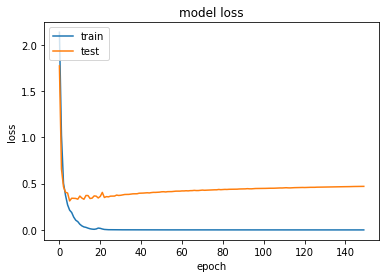

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

The optimal number of epochs for minimizing the test set loss seems to be around 10 epochs. The model was run multiple times to observe that it's typically around after 10 epochs that the test set loss is more. Though for accomodating variations (ups and downs), it's after around 20 epochs that the test loss starts to increases consistently.

### Using Optimizer

Both a hyper-parameter search algorithm (similar to one shared ahead for dropout) and manual analysis was done to choose the below optimizers and for their learning rates (and also for momentum, decay etc. Though a constant learning rate gave the best results in each case), epochs etc. The algorithm has not been shared here (refer to the dropout search algorithm ahead for the code, note: these algorithms can be computationally heavy, especially grid search, as you can imagine, can take hours to identify the best parameters), below are the results by using the best identified optimizers and other best tuned parameters.
    
    Optimizers identified - Adam, Nadam and RMSprop

Model using Adam (94.5% in this instance):

In [11]:
model = Sequential()
model.reset_states()

model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# Max pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.))

model.add(Conv2D(32, (3, 3), activation='relu'))
# Max pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.))

model.add(Dense(10, activation='softmax'))

opt = tf.keras.optimizers.Adam(learning_rate=0.01)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=opt)

# Train the model
history = model.fit(X_train, y_oh_train, batch_size=32, epochs=60, validation_data = (X_test, y_oh_test))

# Evaluate performance
test_loss = model.evaluate(X_test, y_oh_test, batch_size=32)

predictions = model.predict(X_test, batch_size=32)
predictions = np.argmax(predictions, axis=1) # change encoding again
print('Accuracy:', (predictions == y_test).sum() / predictions.shape[0])

Train on 800 samples, validate on 200 samples
Epoch 1/60
800/800 [==============================] - 1s 928us/sample - loss: 1.3133 - val_loss: 0.5109
Epoch 2/60
800/800 [==============================] - 0s 366us/sample - loss: 0.3338 - val_loss: 0.2778
Epoch 3/60
800/800 [==============================] - 0s 344us/sample - loss: 0.1393 - val_loss: 0.2311
Epoch 4/60
800/800 [==============================] - 0s 306us/sample - loss: 0.0855 - val_loss: 0.2839
Epoch 5/60
800/800 [==============================] - 0s 270us/sample - loss: 0.0727 - val_loss: 0.3065
Epoch 6/60
800/800 [==============================] - 0s 323us/sample - loss: 0.0331 - val_loss: 0.2973
Epoch 7/60
800/800 [==============================] - 0s 283us/sample - loss: 0.0333 - val_loss: 0.3325
Epoch 8/60
800/800 [==============================] - 0s 254us/sample - loss: 0.0338 - val_loss: 0.3241
Epoch 9/60
800/800 [==============================] - 0s 253us/sample - loss: 0.0347 - val_loss: 0.3313
Epoch 10/60
800/80

Model using Nadam (96.5% in this instance):

In [12]:
model = Sequential()
model.reset_states()

model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# Max pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.))

model.add(Conv2D(32, (3, 3), activation='relu'))
# Max pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.))

model.add(Dense(10, activation='softmax'))

opt = tf.keras.optimizers.Nadam(learning_rate=0.01)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=opt)

# Train the model
history = model.fit(X_train, y_oh_train, batch_size=32, epochs=60, validation_data = (X_test, y_oh_test))

# Evaluate performance
test_loss = model.evaluate(X_test, y_oh_test, batch_size=32)

predictions = model.predict(X_test, batch_size=32)
predictions = np.argmax(predictions, axis=1) # change encoding again
print('Accuracy:', (predictions == y_test).sum() / predictions.shape[0])

Train on 800 samples, validate on 200 samples
Epoch 1/60
800/800 [==============================] - 1s 1ms/sample - loss: 1.3028 - val_loss: 0.4369
Epoch 2/60
800/800 [==============================] - 0s 293us/sample - loss: 0.2769 - val_loss: 0.3029
Epoch 3/60
800/800 [==============================] - 0s 291us/sample - loss: 0.1184 - val_loss: 0.1914
Epoch 4/60
800/800 [==============================] - 0s 271us/sample - loss: 0.0467 - val_loss: 0.3421
Epoch 5/60
800/800 [==============================] - 0s 291us/sample - loss: 0.0436 - val_loss: 0.1930
Epoch 6/60
800/800 [==============================] - 0s 329us/sample - loss: 0.0094 - val_loss: 0.2371
Epoch 7/60
800/800 [==============================] - 0s 328us/sample - loss: 0.0014 - val_loss: 0.2332
Epoch 8/60
800/800 [==============================] - 0s 389us/sample - loss: 3.7785e-04 - val_loss: 0.2436
Epoch 9/60
800/800 [==============================] - 0s 296us/sample - loss: 2.6164e-04 - val_loss: 0.2497
Epoch 10/60


Model using RMSprop (95% in this instance):

In [13]:
model = Sequential()
model.reset_states()

model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# Max pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.))

model.add(Conv2D(32, (3, 3), activation='relu'))
# Max pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.))

model.add(Dense(10, activation='softmax'))

opt = tf.keras.optimizers.RMSprop(learning_rate=0.01)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=opt)

# Train the model
history = model.fit(X_train, y_oh_train, batch_size=32, epochs=60, validation_data = (X_test, y_oh_test))

# Evaluate performance
test_loss = model.evaluate(X_test, y_oh_test, batch_size=32)

predictions = model.predict(X_test, batch_size=32)
predictions = np.argmax(predictions, axis=1) # change encoding again
print('Accuracy:', (predictions == y_test).sum() / predictions.shape[0])

Train on 800 samples, validate on 200 samples
Epoch 1/60
800/800 [==============================] - 1s 921us/sample - loss: 1.9221 - val_loss: 1.0334
Epoch 2/60
800/800 [==============================] - 0s 289us/sample - loss: 0.5308 - val_loss: 0.3617
Epoch 3/60
800/800 [==============================] - 0s 264us/sample - loss: 0.2613 - val_loss: 0.3003
Epoch 4/60
800/800 [==============================] - 0s 264us/sample - loss: 0.1369 - val_loss: 0.3440
Epoch 5/60
800/800 [==============================] - 0s 267us/sample - loss: 0.1161 - val_loss: 0.2749
Epoch 6/60
800/800 [==============================] - 0s 264us/sample - loss: 0.0497 - val_loss: 0.8137
Epoch 7/60
800/800 [==============================] - 0s 298us/sample - loss: 0.0603 - val_loss: 0.3225
Epoch 8/60
800/800 [==============================] - 0s 364us/sample - loss: 0.0228 - val_loss: 0.3393
Epoch 9/60
800/800 [==============================] - 0s 312us/sample - loss: 0.0435 - val_loss: 0.2913
Epoch 10/60
800/80

#### Dropout Rate

Hyperparameter search for best dropout results in: Best: 0.948748 using {'dropout_rate': <span style="color:red"> **0.5** </span>} 

In [17]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

def create_model(dropout_rate=0.0):
    # create model
    model = Sequential()
    model.reset_states()

    model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    # Max pooling
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(dropout_rate))

    model.add(Conv2D(32, (3, 3), activation='relu'))
    # Max pooling
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())

    model.add(Dense(128, activation='relu'))
    model.add(Dropout(dropout_rate))

    model.add(Dense(10, activation='softmax'))

    opt = tf.keras.optimizers.Nadam(learning_rate=0.01)

    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=["accuracy"])
    return model

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# create model
model = KerasClassifier(build_fn=create_model, epochs=60, batch_size=32, verbose=0)
# define the grid search parameter
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
param_grid = dict(dropout_rate=dropout_rate)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_oh_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.948748 using {'dropout_rate': 0.5}
0.936236 (0.013409) with: {'dropout_rate': 0.0}
0.926244 (0.012771) with: {'dropout_rate': 0.1}
0.947467 (0.018740) with: {'dropout_rate': 0.2}
0.939967 (0.025144) with: {'dropout_rate': 0.3}
0.939962 (0.024602) with: {'dropout_rate': 0.4}
0.948748 (0.007707) with: {'dropout_rate': 0.5}
0.939995 (0.003156) with: {'dropout_rate': 0.6}
0.936240 (0.008174) with: {'dropout_rate': 0.7}
0.893732 (0.014595) with: {'dropout_rate': 0.8}
0.196174 (0.091748) with: {'dropout_rate': 0.9}


#### Best Model
Based on hyperparameter search for various hyperparameters and for best optimizer, the final model was fine tuned as follows.
This best model gave an accuracy of around 97% in this instance, compared to an average model which gives an accuracy of around 86%, whereas the worst model (with various hyperparameters tested, few examples- learning rate of 0.3 or with optimizer as Adadelta) the accuracy was only around 8%.

Note: since fine tuning was done using results from the validation/test set (data was only split into 2 sets here- training and another set we called test set), we can say that the model has been to some extent trained on the test set as well. Hence, ideally we should split the data into 3 sets, training and validation for fine tuning the model and a final test (unseen-holdout) set should be used to check the actual accuracy on an unseen data set and to make sure we didn't overfit while doing the tuning.

In [18]:
model = Sequential()
model.reset_states()

model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# Max pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(32, (3, 3), activation='relu'))
# Max pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))

opt = tf.keras.optimizers.Nadam(learning_rate=0.01)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=opt)

# Train the model
history = model.fit(X_train, y_oh_train, batch_size=32, epochs=50, validation_data = (X_test, y_oh_test))

# Evaluate performance
test_loss = model.evaluate(X_test, y_oh_test, batch_size=32)

predictions = model.predict(X_test, batch_size=32)
predictions = np.argmax(predictions, axis=1) # change encoding again
print('Accuracy:', (predictions == y_test).sum() / predictions.shape[0])

Train on 800 samples, validate on 200 samples
Epoch 1/50
800/800 [==============================] - 1s 1ms/sample - loss: 1.8075 - val_loss: 0.9834
Epoch 2/50
800/800 [==============================] - 0s 323us/sample - loss: 0.7493 - val_loss: 0.3716
Epoch 3/50
800/800 [==============================] - 0s 287us/sample - loss: 0.4329 - val_loss: 0.2940
Epoch 4/50
800/800 [==============================] - ETA: 0s - loss: 0.309 - 0s 290us/sample - loss: 0.3082 - val_loss: 0.3137
Epoch 5/50
800/800 [==============================] - 0s 370us/sample - loss: 0.3499 - val_loss: 0.2485
Epoch 6/50
800/800 [==============================] - 0s 360us/sample - loss: 0.2325 - val_loss: 0.2254
Epoch 7/50
800/800 [==============================] - 0s 370us/sample - loss: 0.2493 - val_loss: 0.1838
Epoch 8/50
800/800 [==============================] - 0s 343us/sample - loss: 0.1853 - val_loss: 0.2019
Epoch 9/50
800/800 [==============================] - 0s 295us/sample - loss: 0.1846 - val_loss: 0.5

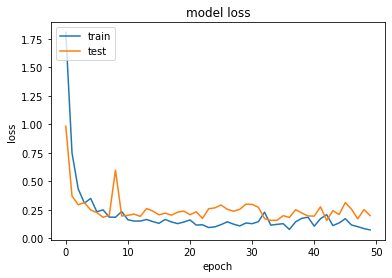

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()